In [2]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode


/opt/anaconda3/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [3]:
print(torch.__version__)  # Should print the installed version of PyTorch
print(torchvision.__version__)  # Should print the installed version of Torchvision

2.3.0
0.18.1a0


In [4]:
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def transform_image(image):
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
    ])
    return transform(image).unsqueeze(0)  # Add batch dimension


In [5]:
def run_object_detection(image):
    with torch.no_grad():  # Disable gradient calculation
        predictions = model(image)
    return predictions

def visualize_detections(image, predictions, threshold=0.5):
    plt.figure(figsize=(12, 8))
    plt.imshow(image)

    boxes = predictions[0]['boxes'].numpy()
    scores = predictions[0]['scores'].numpy()
    labels = predictions[0]['labels'].numpy()

    for i in range(len(boxes)):
        if scores[i] > threshold:  # Filter out low confidence detections
            box = boxes[i]
            plt.gca().add_patch(plt.Rectangle((box[0], box[1]), 
                                                box[2] - box[0], 
                                                box[3] - box[1], 
                                                fill=False, color='red', linewidth=2))
            plt.text(box[0], box[1], f'Label: {labels[i]}, Score: {scores[i]:.2f}', 
                     color='red', fontsize=12)

    plt.axis('off')
    plt.show()




Loading image from: images/pinkcup.jpg


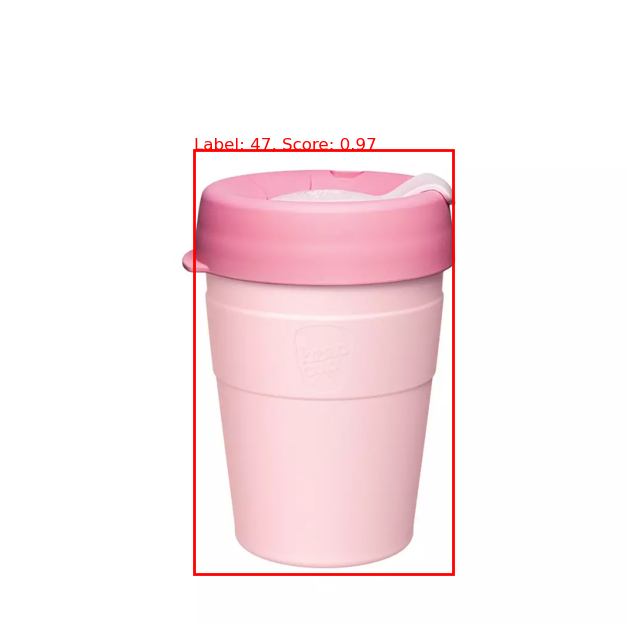

In [6]:
def load_image(image_path):
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return None
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Main execution
if __name__ == "__main__":
    image_path = "images/pinkcup.jpg"  # Replace with absolute path
    print(f"Loading image from: {image_path}")
    image = load_image(image_path)
    
    if image is None:  # Check if the image was loaded successfully
        print("Error: Image not loaded. Please check the path and file format.")
    else:
        image_tensor = transform_image(image)
        predictions = run_object_detection(image_tensor)
        visualize_detections(image, predictions)
